In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import copy

import json

In [2]:
with open ('data/datasets.txt', "r") as json_file:
    datasets = json.loads(json_file.read())

In [3]:
data = datasets['data_20']
n_samples = data['n_samples']
clusters = data['clusters']
cluster_std = data['cluster_std']
X = np.array(data['dataset'])

In [4]:
from utils import def_dataset
n_samples = 90
clusters = 5
cluster_std = 2
X = def_dataset(n_samples,clusters,cluster_std)

In [5]:
Z = X[:,1]#np.ones((n_samples,))#X[:,1]
clusters = 3

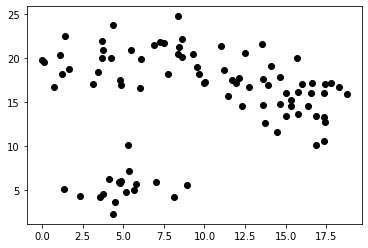

In [6]:
plt.plot(X[:,0],X[:,1], 'ok')
plt.show()

In [7]:
def def_color(X,labels,clusters):
    centroides = [X[labels==i].mean(axis=0) for i in range(clusters)]
    mapping_color = {}
    restantes = list(range(clusters))
    if clusters == 3:
        for point, color in [(np.array((8,20)),'b'), (np.array((16,15)),'r'),
                             (np.array((4,5)),'g')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind])
    elif clusters == 4:
        for point, color in [(np.array((5,20)),'b'), (np.array((10,22)),'r'),
                             (np.array((5,8)),'g'),(np.array((17,15)),'c')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind]) 
    elif clusters == 5:
        for point, color in [(np.array((6,24)),'b'), (np.array((14,25)),'r'),
                             (np.array((9,10)),'g'),(np.array((20,16)),'c'),(np.array((18,21)),'m')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind]) 
    elif clusters == 6:
        for point, color in [(np.array((3,25)),'b'), (np.array((6,25)),'r'),
                             (np.array((13,25)),'m'),(np.array((18,20)),'y'),
                             (np.array((8,8)),'g'),(np.array((20,15)),'c')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind])
    return mapping_color

In [8]:
def def_marker(color):
    maker_color = {'b':'o',
                   'r':'v',
                   'm':'s',
                   'y':'^',
                   'g':'P',
                   'c':'*'}
    return maker_color[color]

[53 62 28]


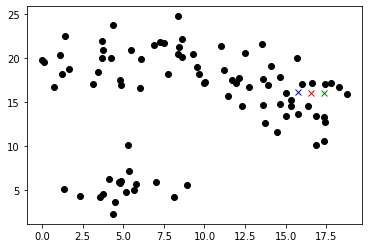

In [12]:
sample = np.random.choice(range(len(X)),3)
print(sample)
X_aux = X[[i for i in range(len(X)) if i not in sample]]

plt.plot(X_aux[:,0],X_aux[:,1], 'ok')
color = ['b','g','r']
c = 0
for i in sample:
    plt.plot(X[i,0],X[i,1], 'x'+color[c])
    c+=1
plt.show()

# Fuzzy C-means Equi-balanced

In [13]:
from fuzzy import fuzzy_constraints_exato, centroides

In [14]:
LABELS, U = fuzzy_constraints_exato(X,Z,clusters,np.copy(X[sample]))

In [15]:
P = centroides(X, U, 2)

In [16]:
labels = np.array(LABELS[-1])

In [17]:
def funcao_objetivo_fuzzy(X,labels):
    obj_func = 0
    for i in range(clusters):
        obj_func+=np.dot(np.linalg.norm(X-X[labels == i].mean(axis=0), axis=1)**2,U[i,:]**2)
    return obj_func

In [18]:
def funcao_objetivo(X,labels):
    obj_func = 0
    for i in range(clusters):
        obj_func+=np.sum(np.linalg.norm(X[labels == i] - X[labels == i].mean(axis=0), axis=1)**2)
    return obj_func

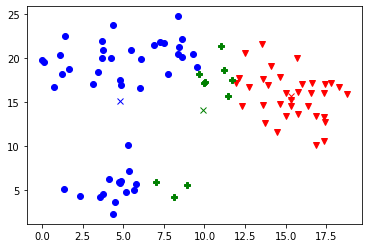

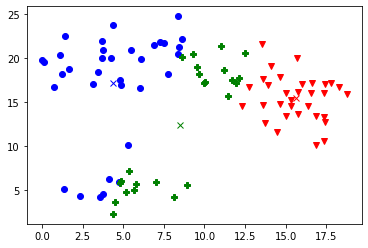

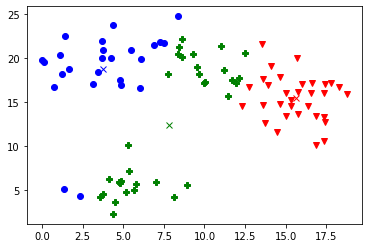

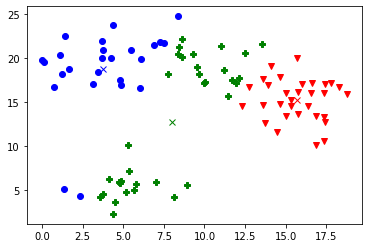

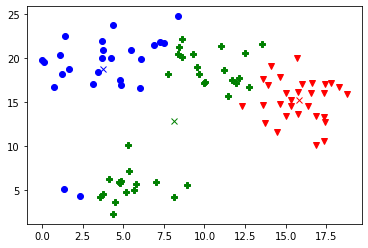

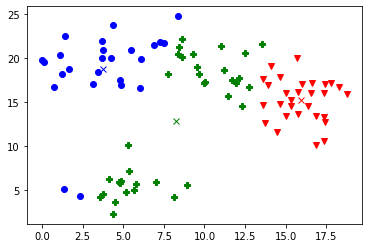

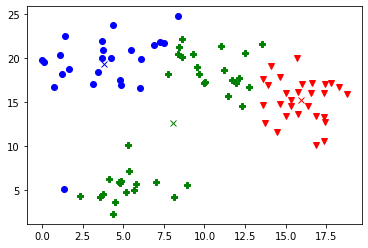

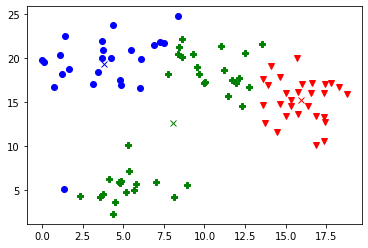

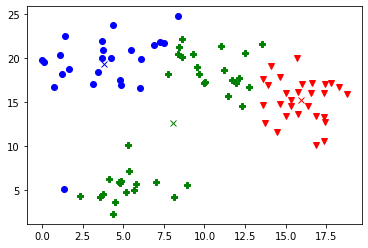

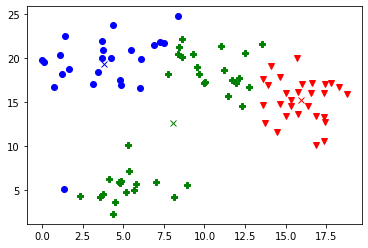

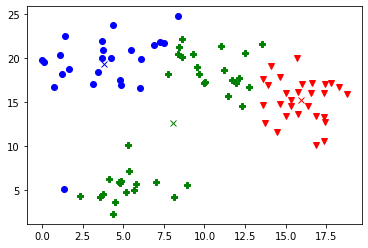

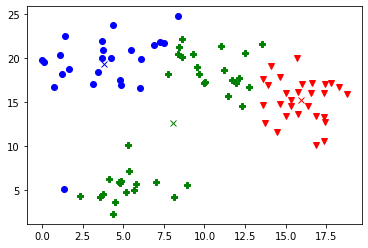

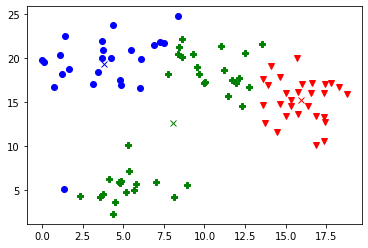

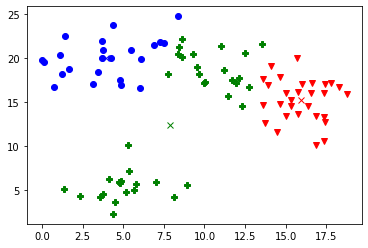

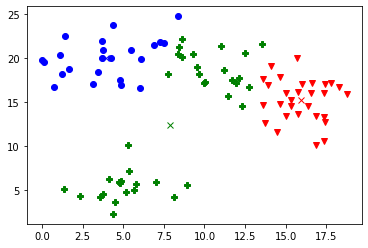

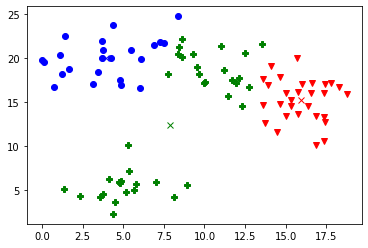

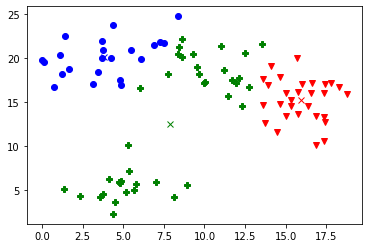

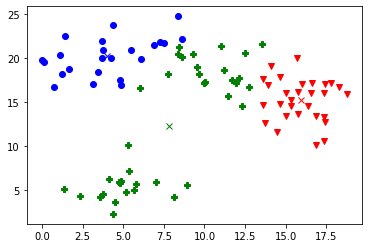

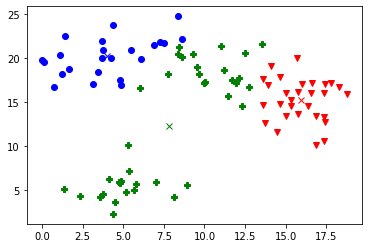

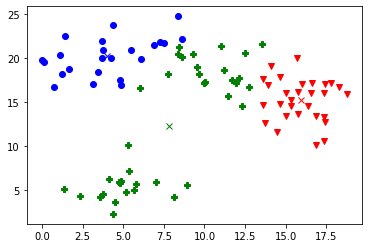

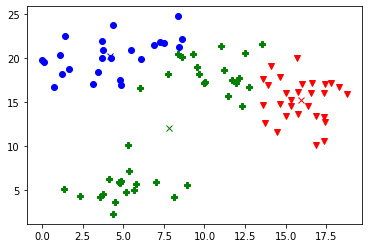

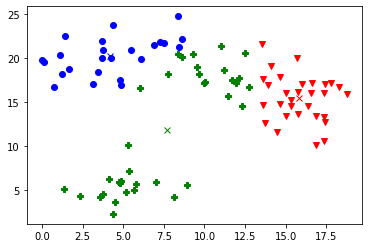

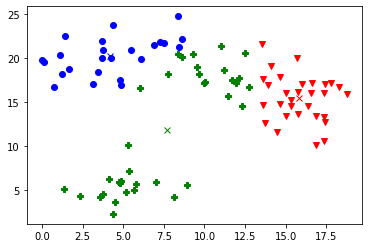

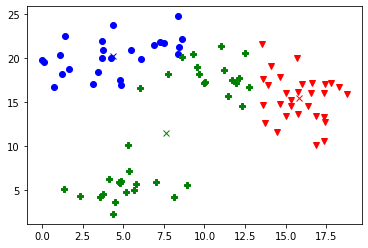

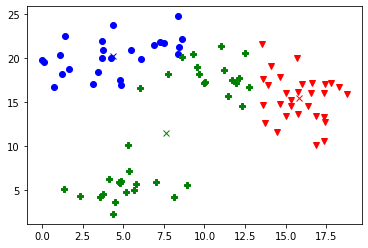

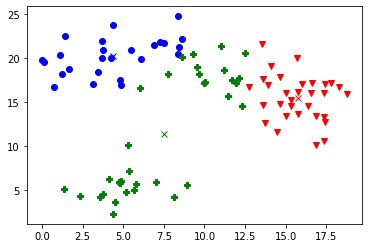

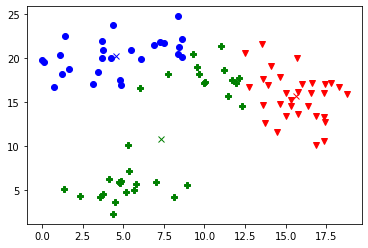

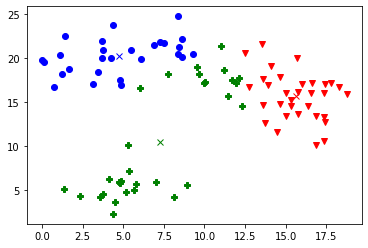

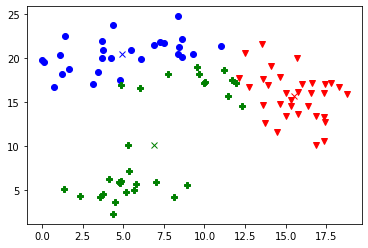

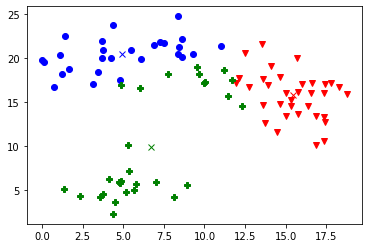

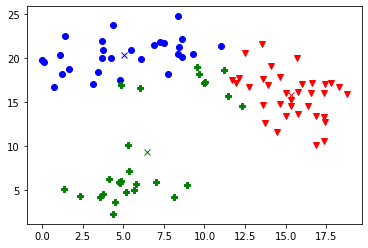

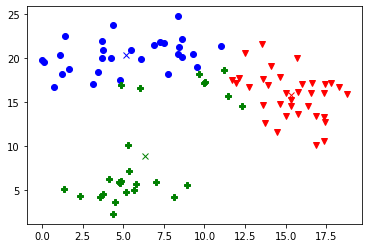

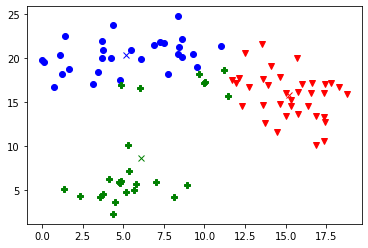

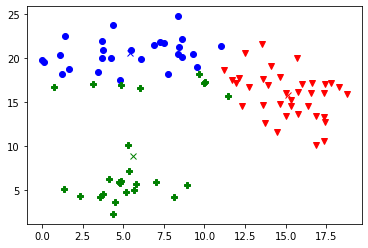

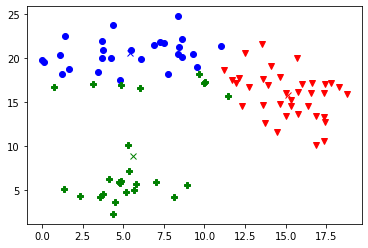

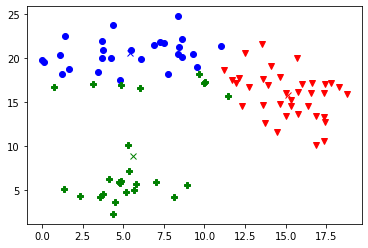

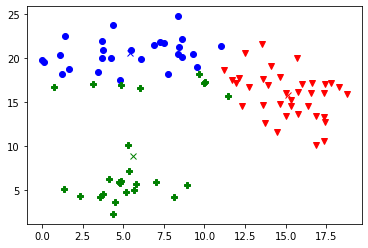

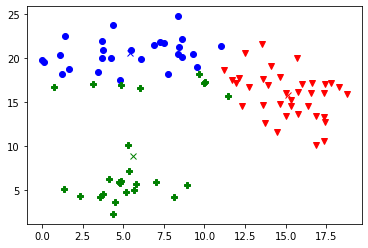

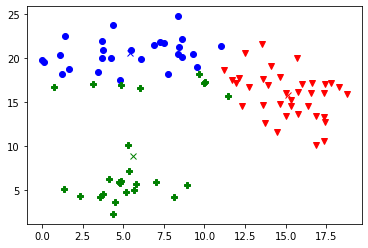

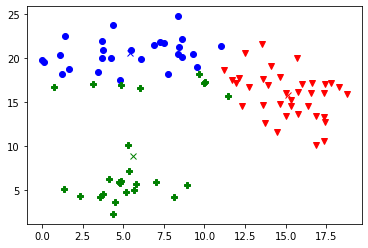

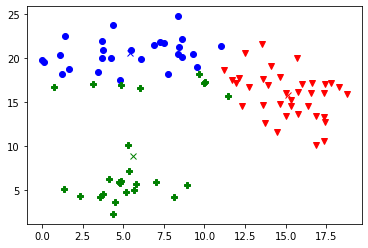

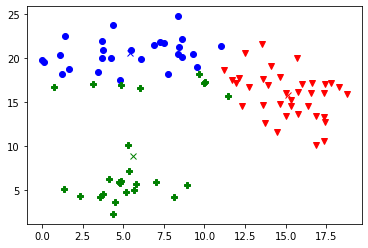

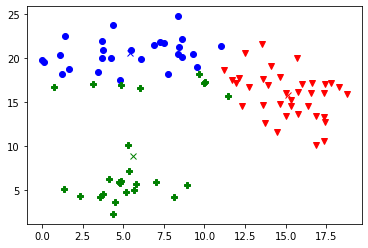

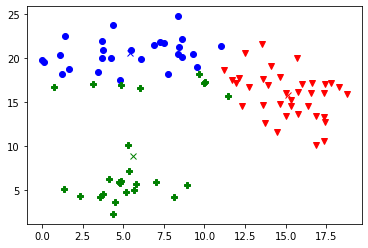

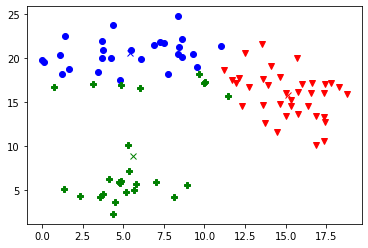

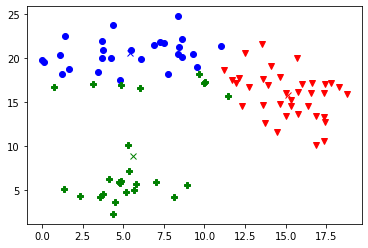

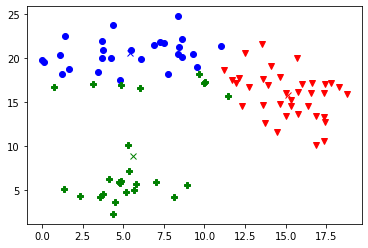

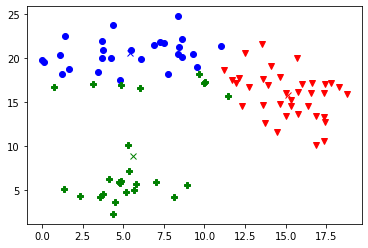

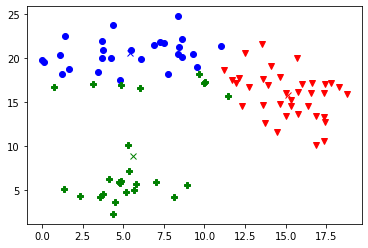

In [19]:
for labels in LABELS[1:]:
    mapping_color = def_color(X,labels,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[labels[i] == c for i in range(len(labels))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
        plt.plot(X0.mean(axis=0)[0],X0.mean(axis=0)[1],color+'x')
    plt.show()

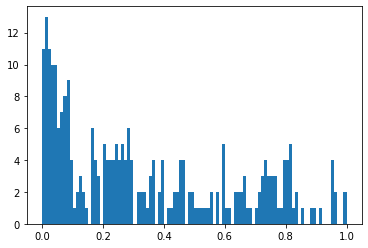

In [20]:
plt.hist(U.reshape(n_samples*clusters), bins=100)
plt.show()

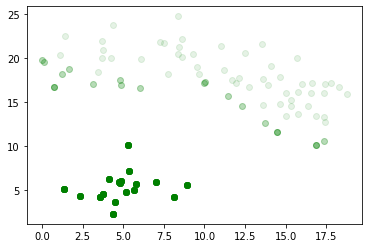

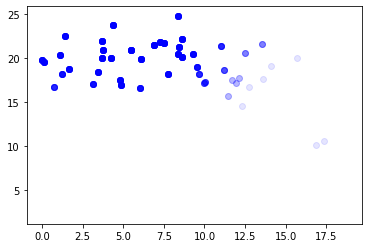

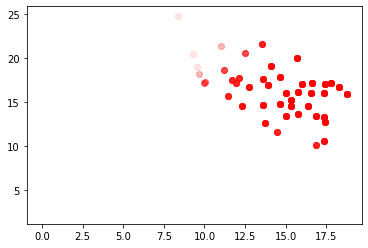

In [13]:
for label in range(3):

    pertencimento_max = U[label]
    color = ['g','b','r'][label]

    labels = np.ones(len(U[label]))*label #LABELS[-1] 

    for i in range(10):
        if i == 0:
            indexes = (np.array(pertencimento_max) < (i+1)/10)
        elif i == 9:
            indexes = (i/10 <= np.array(pertencimento_max)) & (np.array(pertencimento_max) < (i+1)/10)
        else:
            indexes = (i/10 <= np.array(pertencimento_max))
        X_p = X[indexes]
        labels_p = list(np.array(labels)[indexes])
        plt.plot(X_p[:,0], X_p[:,1], color+'o', alpha=i/10)
    plt.show()

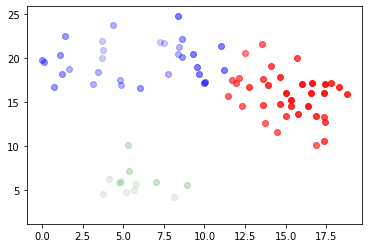

In [14]:
labels = LABELS[-1] 

for i in range(10):
    indexes = (np.quantile(pertencimento_max, i/10) <= pertencimento_max) & (pertencimento_max < np.quantile(pertencimento_max, (i+1)/10)) 
    X_p = X[indexes]
    labels_p = list(np.array(labels)[indexes])
    for c in range(clusters):
        color = ['g','b','r'][c]
        X0 = X_p[[labels_p[i] == c for i in range(len(labels_p))]]
        plt.plot(X0[:,0], X0[:,1], color+'o', alpha=i/10)
plt.show()

In [15]:
np.dot(U,Z)

array([30., 30., 30.])

In [16]:
U.min()

-9.177533519478237e-23

In [17]:
outside = [[(i,j) for j in range(n_samples) if U[i,j]<0] for i in range(clusters)]
outside

[[], [], [(2, 10), (2, 19), (2, 24), (2, 25), (2, 32), (2, 49)]]

In [18]:
outside = [[(i,j) for j in range(n_samples) if U[i,j]>1] for i in range(clusters)]
outside

[[(0, 12), (0, 13), (0, 15), (0, 34), (0, 54), (0, 64), (0, 75), (0, 78)],
 [],
 []]